<a href="https://colab.research.google.com/github/JCaballerot/Credit-Scoring/blob/main/%20CreditScoring/08_EAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [ ]:
df_EAD = pd.read_csv("EAD.csv").dropna()
df_EAD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 1 to 321
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   IngresoCon            98 non-null     float64
 1   Transacciones         98 non-null     float64
 2   RetirosATM            98 non-null     float64
 3   Depositos             98 non-null     float64
 4   Ingresos              98 non-null     float64
 5   Llamadas              98 non-null     float64
 6   AtrasoOtrasEntidades  98 non-null     float64
 7   Deuda                 98 non-null     float64
dtypes: float64(8)
memory usage: 6.9 KB


In [ ]:
df_EAD.head()

,IngresoCon,Transacciones,RetirosATM,Depositos,Ingresos,Llamadas,AtrasoOtrasEntidades,Deuda
1,315.0,81.0,39.0,43.0,3449.0,24.0,10.0,475.0
2,479.0,130.0,76.0,82.0,1624.0,66.0,14.0,480.0
3,496.0,141.0,37.0,11.0,5628.0,65.0,3.0,500.0
4,321.0,87.0,30.0,40.0,396.0,39.0,4.0,91.5
5,594.0,169.0,35.0,421.0,4408.0,74.0,25.0,750.0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_EAD)
sc.transform(df_EAD)[0]

array([-0.59271588, -0.57681145, -0.03636245, -0.69829508,  0.42874462,
       -1.13259679,  0.07717682, -0.02651393])

In [ ]:
y = df_EAD.iloc[:,-1]
X = df_EAD.iloc[:,:-1].astype('float64')
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 1 to 321
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   IngresoCon            98 non-null     float64
 1   Transacciones         98 non-null     float64
 2   RetirosATM            98 non-null     float64
 3   Depositos             98 non-null     float64
 4   Ingresos              98 non-null     float64
 5   Llamadas              98 non-null     float64
 6   AtrasoOtrasEntidades  98 non-null     float64
dtypes: float64(7)
memory usage: 6.1 KB


In [ ]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

# Ridge

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import Ridge
ridge = Ridge(normalize=True)
ridge.fit(X_train, y_train)
ridge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


Ridge(normalize=True)

In [ ]:
ridge.alpha # 1.0 Regresión clasica

1.0

In [ ]:
ridge.coef_

array([ 0.09093259,  0.55895878,  1.8602876 , -0.24073576,  0.04110556,
        0.90814341, -0.57784834])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, ridge.predict(X_test))

75348.03460650865

### Iterando

In [ ]:
alphas = np.linspace(0.01,1,100)
alphas

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [ ]:
import warnings
warnings.filterwarnings('ignore')

mse = []
coeficientes = []
for hiper in alphas:
    ridge = Ridge(alpha = hiper, normalize = True)
    ridge.fit(X_train, y_train)

    coeficientes.append(ridge.coef_)
    mse.append(mean_squared_error(y_test, ridge.predict(X_test)))

df_mse = pd.DataFrame(mse, columns=['mse'])
df_alpha = pd.DataFrame(alphas, columns=['alpha'])

In [ ]:
display(df_mse.head())
display(df_alpha.head())

,mse
0,68193.833575
1,67853.818439
2,67693.834126
3,67603.213537
4,67544.906716


,alpha
0,0.01
1,0.02
2,0.03
3,0.04
4,0.05


In [ ]:
coeficientes[0:5] # los 5 primeros juegos de coeficientes

[array([-1.05664306,  4.87338771,  4.33048773, -0.59859063,  0.08434265,
        -2.0351137 ,  2.64589751]),
 array([-0.84570933,  3.93969496,  4.10424593, -0.59807017,  0.08264185,
        -1.35355527,  2.86993723]),
 array([-0.70075438,  3.31779673,  3.94591166, -0.59300334,  0.08125831,
        -0.91677995,  2.92773985]),
 array([-0.59447937,  2.87457959,  3.82516032, -0.58581053,  0.08006307,
        -0.61463989,  2.901601  ]),
 array([-0.51292805,  2.54325185,  3.72739021, -0.5776185 ,  0.07899117,
        -0.3937515 ,  2.83061471])]

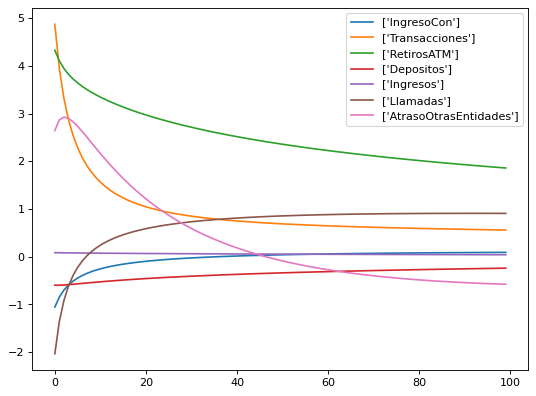

In [ ]:
coeficientes = list(map(list, zip(*coeficientes)))
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='w')
for coef,variable in zip(range(len(coeficientes)), X_train.columns):
    plt.plot(coeficientes[coef], label=[variable])
plt.legend()

In [ ]:
df_alpha_mse = df_alpha.merge(df_mse,left_index=True, right_index=True)
df_alpha_mse

,alpha,mse
0,0.01,68193.833575
1,0.02,67853.818439
2,0.03,67693.834126
3,0.04,67603.213537
4,0.05,67544.906716
...,...,...
95,0.96,74948.178338
96,0.97,75048.515789
97,0.98,75148.606865
98,0.99,75248.447692


In [ ]:
df_alpha_mse.where(df_alpha_mse['mse'] == min(df_alpha_mse['mse'])).dropna()

,alpha,mse
9,0.1,67445.195724


In [ ]:
opt_info = df_alpha_mse.where(df_alpha_mse['mse'] == min(df_alpha_mse['mse'])).dropna()

In [ ]:
opt_alpha = opt_info.loc[:,'alpha'].values
opt_alpha

array([0.1])

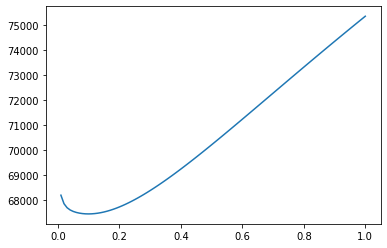

In [ ]:
plt.plot(df_alpha_mse.alpha,df_alpha_mse.mse)

In [ ]:
X_train.columns

Index(['IngresoCon', 'Transacciones', 'RetirosATM', 'Depositos', 'Ingresos',
       'Llamadas', 'AtrasoOtrasEntidades'],
      dtype='object')

In [ ]:
ridge = Ridge(alpha = opt_alpha, normalize = True)
ridge.fit(X_train, y_train)

ridge.coef_

array([-0.28246004,  1.66234521,  3.39676194, -0.53473527,  0.07459527,
        0.17790058,  2.27897706])

### Regresión clasica

In [ ]:
mco = Ridge(alpha = 0, normalize = True)
mco.fit(X_train, y_train)
mean_squared_error(y_test, mco.predict(X_test)) # Nos da un mse mayor que el Ridge

69113.74721944758

### Calculando para un nuevo dato

In [ ]:
x_new=np.array([-0.59271588, -0.57681145, -0.03636245, -0.69829508,  0.42874462,-1.13259679,  0.07717682])#, -0.02651393])
y_est_sc=np.sum(x_new*ridge.coef_)
np.min(df_EAD.Deuda),np.max(df_EAD.Deuda)

(67.5, 1600.0)

In [ ]:
y_est=y_est_sc*(1600.0 -67.5)+67.5
y_est

-752.6570428550676

# Lasso

In [ ]:
from sklearn.linear_model import Lasso

l1_mse = []
l1_coeficientes = []
for hiper in alphas:
    lasso = Lasso(alpha = hiper, normalize = True)
    lasso.fit(X_train, y_train)

    l1_coeficientes.append(lasso.coef_)
    l1_mse.append(mean_squared_error(y_test, lasso.predict(X_test)))

df_mse_l1 = pd.DataFrame(l1_mse, columns=['mse'])
df_alpha = pd.DataFrame(alphas, columns=['alpha'])

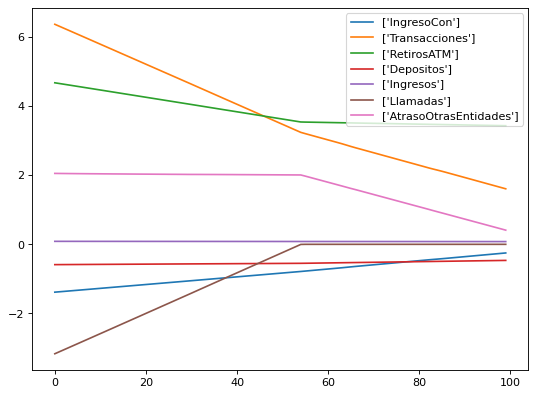

In [ ]:
l1_coeficientes = list(map(list, zip(*l1_coeficientes)))
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
for coef,varaible in zip(range(len(l1_coeficientes)), X_train.columns):
    plt.plot(l1_coeficientes[coef], label=[varaible])
plt.legend()

In [ ]:
df_alpha_mse_l1 = df_alpha.merge(df_mse_l1,left_index=True, right_index=True)
df_alpha_mse_l1.where(df_alpha_mse_l1['mse'] == min(df_alpha_mse_l1['mse'])).dropna()

,alpha,mse
99,1.0,66277.691639
